# Train linear regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/clean.csv', index_col=0)
df.sample(5)

,until_working_time,avg_star,post_finish_percentage,avg_duration_minutes_finished,log_duration,Unnamed: 6,ป้าย,ความสะอาด,แสงสว่าง,สอบถาม,...,กีดขวาง,สายไฟ,PM2.5,น้ำท่วม,ทางเท้า,สัตว์จรจัด,ความปลอดภัย,ห้องน้ำ,ป้ายจราจร,Others
140488,2755,3.87,84.18,72567.0,11.597845,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
554743,0,3.82,84.32,76399.0,8.799511,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
504097,362,3.96,72.70,147061.5,12.077506,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
117702,467,4.15,85.21,58088.0,8.064636,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
748199,70,3.81,84.12,87839.0,10.820418,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(645663, 31)

In [5]:
df.columns

Index(['until_working_time', 'avg_star', 'post_finish_percentage',
       'avg_duration_minutes_finished', 'log_duration', 'Unnamed: 6', 'ป้าย',
       'ความสะอาด', 'แสงสว่าง', 'สอบถาม', 'ร้องเรียน', 'การเดินทาง', 'จราจร',
       'ท่อระบายน้ำ', 'สะพาน', 'เสียงรบกวน', 'ต้นไม้', 'คนจรจัด', 'คลอง',
       'ถนน', 'เสนอแนะ', 'กีดขวาง', 'สายไฟ', 'PM2.5', 'น้ำท่วม', 'ทางเท้า',
       'สัตว์จรจัด', 'ความปลอดภัย', 'ห้องน้ำ', 'ป้ายจราจร', 'Others'],
      dtype='object')

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
target = ['log_duration']
X = df.drop(target, axis=1)
y = df[target]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [16]:
X_train.shape

(516530, 30)

In [17]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [18]:
# print the intercept
print(lm)
print(lm.intercept_)
print(lm.n_features_in_)
print(lm.feature_names_in_)

LinearRegression()
[8.55057057]
30
['until_working_time' 'avg_star' 'post_finish_percentage'
 'avg_duration_minutes_finished' 'Unnamed: 6' 'ป้าย' 'ความสะอาด'
 'แสงสว่าง' 'สอบถาม' 'ร้องเรียน' 'การเดินทาง' 'จราจร' 'ท่อระบายน้ำ'
 'สะพาน' 'เสียงรบกวน' 'ต้นไม้' 'คนจรจัด' 'คลอง' 'ถนน' 'เสนอแนะ' 'กีดขวาง'
 'สายไฟ' 'PM2.5' 'น้ำท่วม' 'ทางเท้า' 'สัตว์จรจัด' 'ความปลอดภัย' 'ห้องน้ำ'
 'ป้ายจราจร' 'Others']


In [11]:
coeff_df = pd.DataFrame(lm.coef_,lm.feature_names_in_,columns=['Coefficient'])
coeff_df

ValueError: Shape of passed values is (1, 30), indices imply (30, 1)

In [19]:
predictions = lm.predict(X_test)

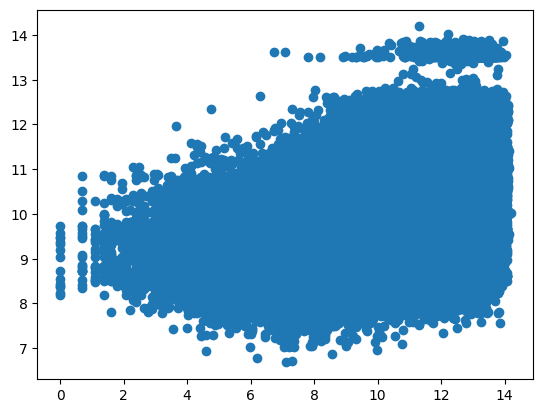

In [20]:
plt.scatter(y_test,predictions)

In [21]:
from sklearn import metrics

In [22]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.702450536248054
MSE: 4.470854687577416
RMSE: 2.1144395682018007
